# Lab #3

In [64]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import KBinsDiscretizer
from pgmpy.estimators import HillClimbSearch

ModuleNotFoundError: No module named 'pgmpy'

In [3]:
source_data_path = "./../tcs_stock.csv"
row_df = pd.read_csv(source_data_path)

## Step 1. Choose variables for sampling from your dataset (overall – about 10 variables, 3-4 –target variables, the rest - predictors).

In [5]:
row_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


#### Target: 
High, Low, Trades
#### Predictors:
Prev Close, Open, Close, VWAP, Volume, Deliverable Volume

In [45]:
df = row_df[['High', 'Low', 'Trades', 'Prev Close', 'Open', 'Close', 'VWAP', 'Volume', 'Deliverable Volume', 'Turnover']]
df.head()

,High,Low,Trades,Prev Close,Open,Close,VWAP,Volume,Deliverable Volume,Turnover
0,2567.00,2541.00,8002,2558.25,2567.0,2545.55,2548.51,183415,52870,4.674345e+13
1,2590.95,2550.60,27585,2545.55,2551.0,2579.45,2568.19,462870,309350,1.188740e+14
2,2599.90,2524.65,43234,2579.45,2581.0,2540.25,2563.94,877121,456728,2.248886e+14
3,2529.10,2440.00,84503,2540.25,2529.1,2446.60,2466.90,1211892,714306,2.989615e+14
4,2479.15,2407.45,101741,2446.60,2470.0,2417.70,2433.96,1318166,886368,3.208362e+14


Distributions:  
High - hypsecant with param 1.0910  
Low - laplace with param 1.3288  
Trades - gumbel_r with param 3.3611

Prev Close- laplace with parameter 7.3622  
Open - laplace with parameter 8.493  
Close - laplace with parameter 7.6574  
VWAP - laplace with parameter 1.1143  
Volume - johnsonsb with parameter 5.2133  
Deliverable Volume - invgamma with parameter 9.9473

# Сема, можешь сделать на них кучу графиков маленьких в таблице 3х3 типа? С гистограммой и графиком платности, для наглядности

## Step 2. Using univariate parametric distributions that were fitted in Lab#2 make sampling of chosen target variables. Use for this 2 different sampling methods.

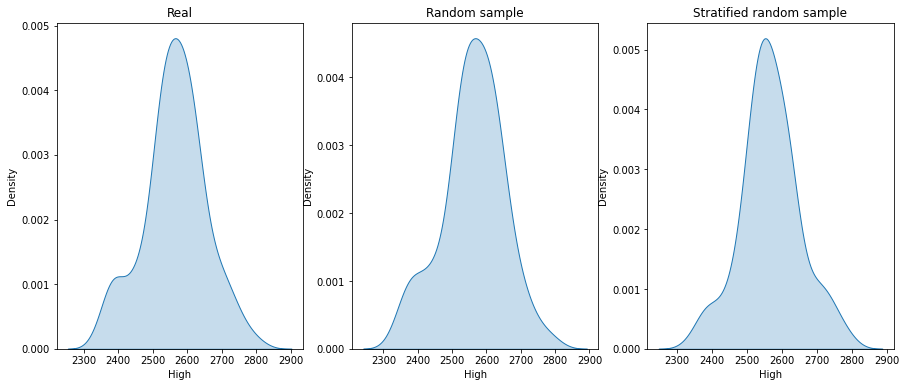

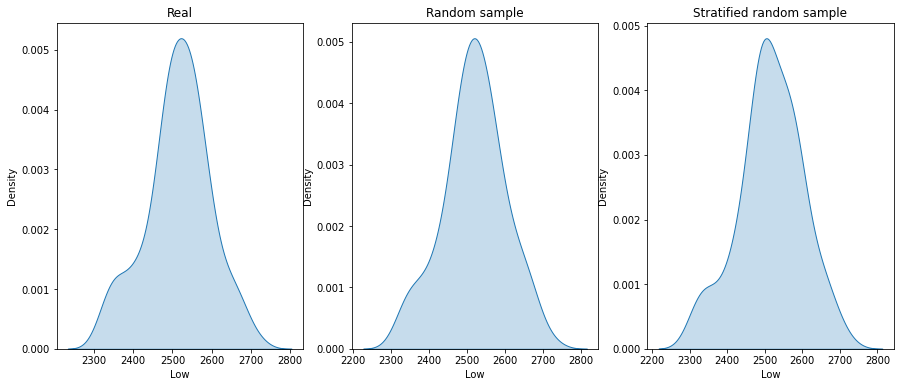

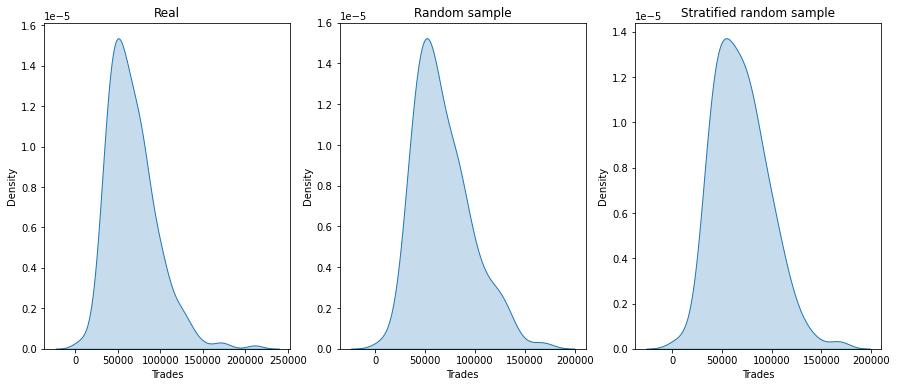

In [40]:
labels =['High', 'Low', 'Trades']

for l in labels:
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    sns.kdeplot(ax=axes[0], data=df, x=l, shade=True)

    # Random sample
    sample_data = df.sample(frac=.5)
    sns.kdeplot(ax=axes[1], data=sample_data, x=l, shade=True)

    # Stratified random sample
    mean = df[l].mean()

    sample_data_0 = df[df[l] > mean].sample(n=60, axis=0)
    sample_data_1 = df[df[l] < mean].sample(n=60, axis=0)
    sample_data = pd.concat([sample_data_0, sample_data_1])
    sns.kdeplot(ax=axes[2], data=sample_data, x=l, shade=True)

    axes[0].set_title('Real')
    axes[1].set_title('Random sample')
    axes[2].set_title('Stratified random sample')
    plt.show()

## Step 3. Estimate relations between predictors and chosen target variables. At least, they should have significant correlation coefficients.

In [42]:
predictors = df[['Prev Close', 'Open', 'Close', 'VWAP', 'Volume', 'Deliverable Volume']]
targets = df[['High', 'Low', 'Trades']]

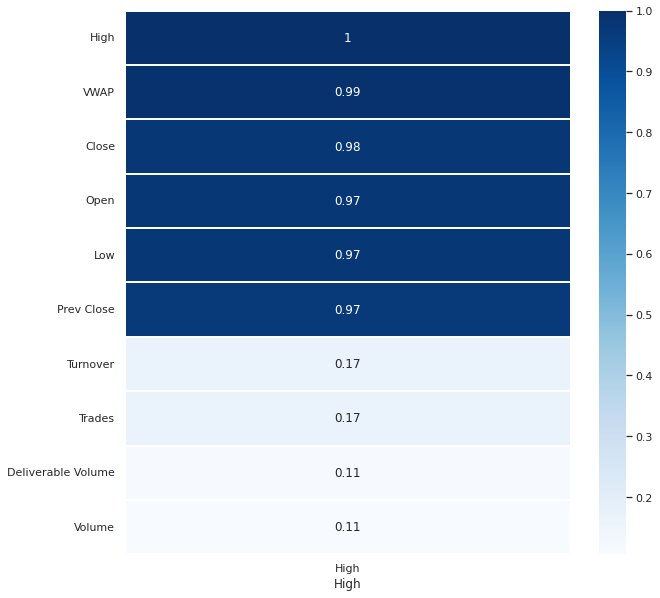

In [46]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

sns.heatmap(
    df.corr()[['High']].sort_values(by='High', ascending=False),
    cmap='Blues',
    annot=True,
    linewidths=0.25
)

ax.set(xlabel='High')
plt.show()

We have got troubles with correlation of Volume and Deliverable Voliume. So we will remove this predictors from dataset. Other predictors with ban correlation will be used, because we have small number of columns ¯\\_(ツ)_/¯

Another point - lets use Trades feature as target. But it has a problem - only turnover has a great correlation with it. We can check out make decision after all.

In [50]:
df = row_df[['High', 'Low', 'Trades', 'Prev Close', 'Open', 'Close', 'VWAP', 'Turnover']]

# Сема, можешь графики ниже нормально отрисовать?

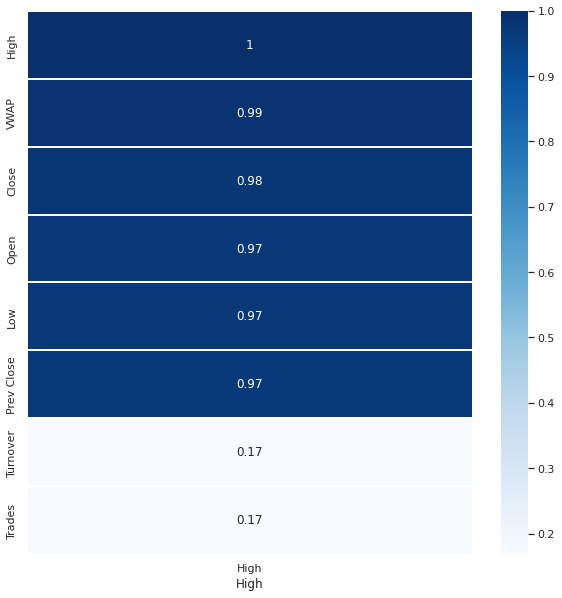

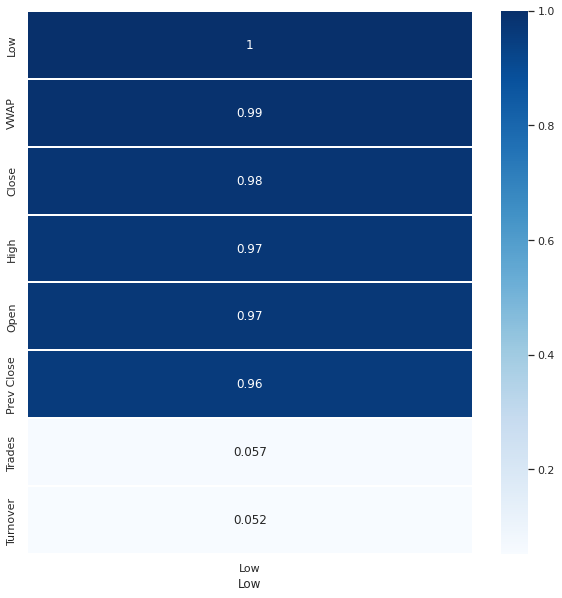

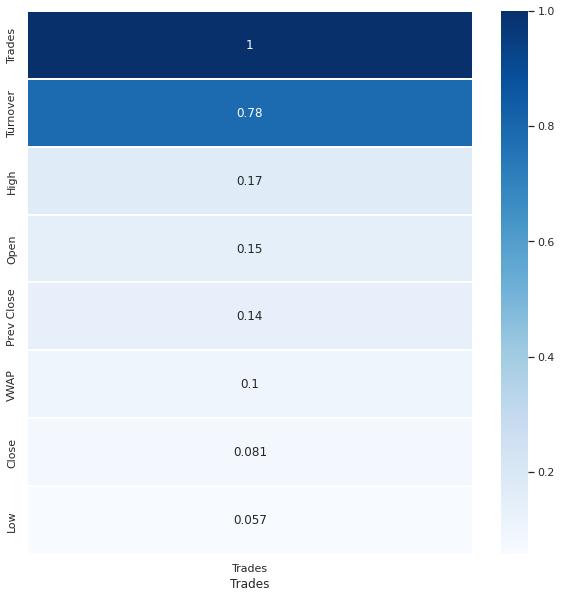

In [51]:
labels = ['High', 'Low', 'Trades']

for l in labels:
    figure, ax = plt.subplots(1, 1, figsize=(10, 10))
    sns.set_theme(style='whitegrid', palette='pastel')

    sns.heatmap(
        df.corr()[[l]].sort_values(by=l, ascending=False),
        cmap='Blues',
        annot=True,
        linewidths=0.25
    )

    ax.set(xlabel=l)
    plt.show()

## Step 4. Build a Bayesian network for chosen set of variables. Choose its structure on the basis of multivariate analysis and train distributions in nodes using chosen algorithm.

In [55]:
df_transformed = df.copy()
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
df_discretized = discretizer.fit_transform(df.values[:])

In [59]:
df_transformed[:] = df_discretized
df_transformed

,High,Low,Trades,Prev Close,Open,Close,VWAP,Turnover
0,4.0,5.0,0.0,5.0,5.0,5.0,5.0,0.0
1,5.0,5.0,1.0,5.0,5.0,5.0,5.0,1.0
2,5.0,5.0,1.0,5.0,6.0,4.0,5.0,2.0
3,3.0,3.0,3.0,4.0,4.0,2.0,3.0,3.0
4,2.0,2.0,4.0,2.0,3.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...
243,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0
244,2.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0
245,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0
246,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [60]:
hc_search = HillClimbSearch(data=df_transformed)
model_k2 = hc_search.estimate(scoring_method=K2Score(df_transformed))


NameError: name 'HillClimbSearch' is not defined